# Final Project Submission

Please fill out:
* Student name: Thiago Bassi
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [131]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import sqlite3
import matplotlib.pyplot as plt
import json
import pickle
import seaborn as sns
from copy import deepcopy

In [189]:
# Reading the csv and the tvs, there was ont that was need to put one enconding
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter = '\t')
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter = '\t', encoding='ISO-8859-1')
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

In [190]:
con = sqlite3.connect('data/im.db')
cursor_obj = con.cursor()

In [191]:
#creating the queries movies
# qr_movie_basics = 'SELECT A.movie_id, B.title, B.region, B.language, B.types, B.attributes, B.is_original_title, A.primary_title, A.original_title, A.start_year, A.runtime_minutes, A.genres FROM movie_basics A , movie_akas B WHERE A.movie_id=B.movie_id'
qr_movie_akas = 'SELECT B.movie_id, B.title, B.region, B.language, B.types, B.attributes, B.is_original_title, A.primary_title, A.original_title, A.start_year, A.runtime_minutes, A.genres, C.averagerating, C.numvotes FROM movie_akas B, movie_basics A, movie_ratings C WHERE B.movie_id=A.movie_id and B.movie_id=C.movie_id' #
# qr_movie_ratings = 'SELECT C.movie_id, C.averagerating, C.numvotes FROM movie_ratings C, movie_basics A WHERE C.movie_id=A.movie_id' #

In [192]:
#upload the tables with data movies
# tb_movie_basics = pd.read_sql(qr_movie_basics,con)
tb_movie_akas = pd.read_sql(qr_movie_akas,con)
# tb_movie_ratings = pd.read_sql(qr_movie_ratings,con)

#creating the queries person
qr_persons = 'SELECT * FROM persons' # DONE
qr_directors = 'SELECT A.movie_id, A.person_id, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM directors A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id' #
qr_writers = 'SELECT A.movie_id, A.person_id, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM writers A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id  AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id'
qr_known_for = 'SELECT A.movie_id, A.person_id, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM known_for A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id  AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id' #DONE
qr_principals = 'SELECT A.movie_id, A.person_id, A.category, A.job, A.characters, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM principals A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id  AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id' #DONE

#upload the tables with data person
tb_persons = pd.read_sql(qr_persons,con)
tb_directors = pd.read_sql(qr_directors,con)
tb_writers = pd.read_sql(qr_writers,con)
tb_principals = pd.read_sql(qr_principals,con)
tb_known_for = pd.read_sql(qr_known_for,con)

#spliting genres at persons table
tb_writers['genres_split'] = tb_writers['genres'].str.split(",")
tb_directors['genres_split'] = tb_directors['genres'].str.split(",")
tb_principals['genres_split'] = tb_principals['genres'].str.split(",")
tb_known_for['genres_split'] = tb_known_for['genres'].str.split(",")

#spliting primary pofession at persons table
tb_writers['primary_profession_split'] = tb_writers['primary_profession'].str.split(",")
tb_directors['primary_profession_split'] = tb_directors['primary_profession'].str.split(",")
tb_principals['primary_profession_split'] = tb_principals['primary_profession'].str.split(",")
tb_known_for['primary_profession_split'] = tb_known_for['primary_profession'].str.split(",")

In [193]:
#spliting genres at movies table
tb_movie_akas['genres_split'] = tb_movie_akas['genres'].str.split(",")
# tb_movie_basics['genres_split'] = tb_movie_basics['genres'].str.split(",")

cat_cols =  ['primary_profession','region','language','types','attributes','genres']

tb_writers[cat_cols] = \
tb_writers[cat_cols].astype('category')
tb_directors[cat_cols] = \
tb_directors[cat_cols].astype('category')
tb_principals[cat_cols] = \
tb_principals[cat_cols].astype('category')
tb_known_for[cat_cols] = \
tb_known_for[cat_cols].astype('category')

In [194]:
#Creating the field all titles
# tb_writers['all_titles'] = list(tb_writers.groupby(['movie_id'])['title'].transform(lambda x: '|'.join(x)))
# tb_directors['all_titles'] = list(tb_directors.groupby(['movie_id'])['title'].transform(lambda x: '|'.join(x)))
# tb_principals['all_titles'] = list(tb_principals.groupby(['movie_id'])['title'].transform(lambda x: '|'.join(x)))
# tb_known_for['all_titles'] = list(tb_known_for.groupby(['movie_id'])['title'].transform(lambda x: '|'.join(x)))
tb_movie_akas['all_titles'] = list(tb_movie_akas.groupby(['movie_id'])['title'].transform(lambda x: '|'.join(x)))
# tb_movie_basics['all_titles'] = list(tb_movie_basics.groupby(['movie_id'])['title'].transform(lambda x: '|'.join(x)))

# separating only the movies that are the principal name in people
tb_writers_tot = deepcopy(tb_writers[tb_writers['is_original_title'] == 1])
tb_directors_tot = deepcopy(tb_directors[tb_directors['is_original_title'] == 1])
tb_principals_tot = deepcopy(tb_principals[tb_principals['is_original_title'] == 1])
tb_known_for_tot = deepcopy(tb_known_for[tb_known_for['is_original_title'] == 1])

In [195]:
tb_movie_akas.columns

Index(['movie_id', 'title', 'region', 'language', 'types', 'attributes',
       'is_original_title', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes',
       'genres_split', 'all_titles'],
      dtype='object')

In [196]:
# separating only the movies that are the principal name in movies
tb_movie_akas_tot = deepcopy(tb_movie_akas[tb_movie_akas['is_original_title'] == 1])
# tb_movie_basics_tot = deepcopy(tb_movie_basics[tb_movie_basics['is_original_title'] == 1])

#make all_titles into a list rfor people
tb_writers_tot['all_titles'] = tb_writers_tot['all_titles'].str.split("|")
tb_directors_tot['all_titles'] = tb_directors_tot['all_titles'].str.split("|")
tb_principals_tot['all_titles'] = tb_principals_tot['all_titles'].str.split("|")
tb_known_for_tot['all_titles'] = tb_known_for_tot['all_titles'].str.split("|")

#make all_titles into a list for movie
tb_movie_akas_tot['all_titles'] = tb_movie_akas_tot['all_titles'].str.split("|")
tb_movie_basics_tot['all_titles'] = tb_movie_basics_tot['all_titles'].str.split("|")

In [197]:
## Removing movies before 2010
#convert to datetime
# tb_movie_basics_tot['year'] = tb_movie_basics_tot['start_year'].astype(int)
tb_movie_akas_tot['year'] = pd.to_datetime(tb_movie_akas_tot['start_year']).astype(int)
# tb_known_for_tot['year'] = pd.to_datetime(tb_known_for_tot['start_year']).astype(int)
# tb_principals_tot['year'] = pd.to_datetime(tb_principals_tot['start_year']).astype(int)
# tb_directors_tot['year'] = pd.to_datetime(tb_directors_tot['start_year']).astype(int)
# tb_writers_tot['year'] = pd.to_datetime(tb_writers_tot['start_year']).astype(int)

#CSV s values 

In [198]:
#Step 1
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: x.strip('$'))
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].map(lambda x: x.strip('$'))
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(lambda x: x.strip('$'))

In [199]:
#STEP 2
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: float(x.replace(",", "")))
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].map(lambda x: float(x.replace(",", "")))
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(lambda x: float(x.replace(",", "")))

In [200]:
##New Columns for Profit information
#domestic_profiit
tn_movie_budgets['domestic_profit'] = tn_movie_budgets['domestic_gross'] - tn_movie_budgets['production_budget']

In [201]:
#total_profit
tn_movie_budgets['total_profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']

In [202]:
#roi
tn_movie_budgets['roi'] = (tn_movie_budgets['worldwide_gross']-tn_movie_budgets['production_budget'])/tn_movie_budgets['production_budget']

In [203]:
## Removing movies before 2010
#convert to datetime
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])
#set index to datetime
tn_movie_budgets.set_index('release_date', inplace=True)

In [204]:
#slice out our timeframe
recent_movie_budgets = deepcopy(tn_movie_budgets.sort_index().loc['01-01-2010':'12-31-2022'])
recent_movie_budgets.reset_index(inplace = True)

In [205]:
recent_movie_budgets['year'] = recent_movie_budgets['release_date'].dt.year

In [126]:
# tb_movie_basics_tot.reset_index(inplace = True)

NameError: name 'tb_movie_basics_tot' is not defined

In [206]:
production_budget_per = np.percentile(recent_movie_budgets['production_budget'],[0,25,50,75,100])
# domestic_gross_per = np.percentile(recent_movie_budgets['domestic_gross'],[0,25,50,75,100])
# worldwide_gross_per = np.percentile(recent_movie_budgets['worldwide_gross'],[0,25,50,75,100])
# domestic_profit_per = np.percentile(recent_movie_budgets['domestic_profit'],[0,25,50,75,100])
# total_profit_per = np.percentile(recent_movie_budgets['total_profit'],[0,25,50,75,100])
# roi_per = np.percentile(recent_movie_budgets['roi'],[0,25,50,75,100])

In [207]:
recent_movie_budgets['production_budget_cat'] = pd.qcut(recent_movie_budgets['production_budget'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])
# recent_movie_budgets['domestic_gross_cat'] = pd.qcut(recent_movie_budgets['domestic_gross'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])
# recent_movie_budgets['worldwide_gross_cat'] = pd.qcut(recent_movie_budgets['worldwide_gross'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])
# recent_movie_budgets['domestic_profit_cat'] = pd.qcut(recent_movie_budgets['domestic_profit'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])
# recent_movie_budgets['total_profit_cat'] = pd.qcut(recent_movie_budgets['total_profit'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])
# recent_movie_budgets['roi_cat'] = pd.qcut(recent_movie_budgets['roi'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])

In [208]:
recent_movie_budgets['production_budget_cat'] = pd.qcut(recent_movie_budgets['production_budget'], 5, labels = ['cat1', 'cat2', 'cat3', 'cat4','cat5'])
# recent_movie_budgets['domestic_gross_cat'] = pd.qcut(recent_movie_budgets['domestic_gross'], 5, labels = ['cat1', 'cat2', 'cat3', 'cat4','cat5'])
# recent_movie_budgets['worldwide_gross_cat'] = pd.qcut(recent_movie_budgets['worldwide_gross'], 5, labels = ['cat1', 'cat2', 'cat3', 'cat4','cat5'])
# recent_movie_budgets['domestic_profit_cat'] = pd.qcut(recent_movie_budgets['domestic_profit'], 5, labels = ['cat1', 'cat2', 'cat3', 'cat4','cat5'])
# recent_movie_budgets['total_profit_cat'] = pd.qcut(recent_movie_budgets['total_profit'], 5, labels = ['cat1', 'cat2', 'cat3', 'cat4','cat5'])
# recent_movie_budgets['roi_cat'] = pd.qcut(recent_movie_budgets['roi'], 5, labels = ['cat1', 'cat2', 'cat3', 'cat4','cat5'])

In [209]:
tb_movie_akas_tot

,movie_id,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_split,all_titles,year
38,tt0369610,Jurassic World,None,None,original,None,1.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,"[Action, Adventure, Sci-Fi]",Джурасик свят|Jurashikku warudo|Jurassic World...,2015
80,tt0401729,John Carter,None,None,original,None,1.0,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,"[Action, Adventure, Sci-Fi]",Джон Картер: Мiж двох свiтiв|John Carter of Ma...,2012
83,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,None,None,original,None,1.0,Versailles Rediscovered - The Sun King's Vanis...,Versailles Rediscovered - The Sun King's Vanis...,2019,52.0,Documentary,7.0,5,[Documentary],Versailles Rediscovered - The Sun King's Vanis...,2019
120,tt1014759,Alice in Wonderland,None,None,original,None,1.0,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",6.5,358813,"[Adventure, Family, Fantasy]",Alice Dar Sarzamin E Ajayeb|Η Αλίκη στη χώρα τ...,2010
152,tt1179034,From Paris with Love,None,None,original,None,1.0,From Paris with Love,From Paris with Love,2010,92.0,"Action,Crime,Thriller",6.5,107079,"[Action, Crime, Thriller]",Armastusega Pariisist|Dupla Implacável|París e...,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261793,tt9644084,Der Atem,None,None,original,None,1.0,Der Atem,Der Atem,2019,95.0,Documentary,5.2,5,[Documentary],Der Atem|Der Atem|The Breath,2019
261797,tt9657946,Querência,None,None,original,None,1.0,Homing,Querência,2019,90.0,Drama,6.0,16,[Drama],Homing|Querência|Querência,2019
261799,tt9723084,Anderswo. Allein in Afrika,None,None,original,None,1.0,Anderswo. Allein in Afrika,Anderswo. Allein in Afrika,2018,103.0,"Adventure,Documentary",6.7,35,"[Adventure, Documentary]",Anderswo. Allein in Afrika|Anderswo. Allein in...,2018
261801,tt9726638,Monkey King: The Volcano,None,None,original,None,1.0,Monkey King: The Volcano,Monkey King: The Volcano,2019,90.0,"Action,Adventure,Comedy",6.0,6,"[Action, Adventure, Comedy]",Qi Tian Da Sheng 2|Monkey King: The Volcano|Qi...,2019


movie_base = tb_movie_basics_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0], left_on=['title','year'],right_on=['movie','year'], how = 'inner')

In [361]:
# directors_movie = tb_directors_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0],left_on=['title','year'],right_on=['movie','year'], how = 'inner')
# known_for_movie = tb_known_for_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0],left_on=['title','year'],right_on=['movie','year'], how = 'inner')
aka_movie = tb_movie_akas_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0],left_on=['title','year'],right_on=['movie','year'], how = 'inner')
# principals_movie = tb_principals_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0],left_on=['title','year'],right_on=['movie','year'], how = 'inner')
# writers_movie = tb_writers_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0],left_on=['title','year'],right_on=['movie','year'], how = 'inner')

In [362]:
cat1_budgets = aka_movie[aka_movie['production_budget'] < 10000000.0]
cat2_budgets = aka_movie[aka_movie['production_budget'].between(10000000.0, 26000000.0)]
cat3_budgets = aka_movie[aka_movie['production_budget'].between(26000000, 60000000.0)]
cat4_budgets = aka_movie[aka_movie['production_budget'] > 60000000.0]

In [363]:
cat1_budgets_flop = cat1_budgets[cat1_budgets['roi'] < 0]
cat2_budgets_flop = cat2_budgets[cat2_budgets['roi'] < 0]
cat3_budgets_flop = cat3_budgets[cat3_budgets['roi'] < 0]
cat4_budgets_flop = cat4_budgets[cat4_budgets['roi'] < 0]

In [364]:
cat1_cashcow = cat1_budgets[cat1_budgets['roi'] > 10]
cat2_cashcow = cat2_budgets[cat2_budgets['roi'] > 5]
cat3_cashcow = cat3_budgets[cat3_budgets['roi'] > 5]
cat4_cashcow = cat4_budgets[cat4_budgets['roi'] > 10]

In [457]:
len(cat4_budgets.sort_values(by = 'roi', ascending=False)['title'])

327

In [434]:
Top_Cat1_Movies = list(cat1_budgets.sort_values(by = 'roi', ascending=False).head(50)['title'].values)
Top_Cat2_Movies = list(cat2_budgets.sort_values(by = 'roi', ascending=False).head(50)['title'].values)
Top_Cat3_Movies = list(cat3_budgets.sort_values(by = 'roi', ascending=False).head(50)['title'].values)
Top_Cat4_Movies = list(cat4_budgets.sort_values(by = 'roi', ascending=False).head(50)['title'].values)

In [436]:
Btm_Cat1_Movies = list(cat1_budgets.sort_values(by = 'roi', ascending=False).tail(50)['title'].values)
Btm_Cat2_Movies = list(cat2_budgets.sort_values(by = 'roi', ascending=False).tail(50)['title'].values)
Btm_Cat3_Movies = list(cat3_budgets.sort_values(by = 'roi', ascending=False).tail(50)['title'].values)
Btm_Cat4_Movies = list(cat4_budgets.sort_values(by = 'roi', ascending=False).tail(50)['title'].values)

In [437]:
Top_Cat1_Movie_Genres = aka_movie_ex[aka_movie_ex['title'].isin(Top_Cat1_Movies)]['genres_split'].value_counts()
Top_Cat2_Movie_Genres = aka_movie_ex[aka_movie_ex['title'].isin(Top_Cat2_Movies)]['genres_split'].value_counts()
Top_Cat3_Movie_Genres = aka_movie_ex[aka_movie_ex['title'].isin(Top_Cat3_Movies)]['genres_split'].value_counts()
Top_Cat4_Movie_Genres = aka_movie_ex[aka_movie_ex['title'].isin(Top_Cat4_Movies)]['genres_split'].value_counts()

In [438]:
Btm_Cat1_Movie_Genres = aka_movie_ex[aka_movie_ex['title'].isin(Btm_Cat1_Movies)]['genres_split'].value_counts()
Btm_Cat2_Movie_Genres = aka_movie_ex[aka_movie_ex['title'].isin(Btm_Cat2_Movies)]['genres_split'].value_counts()
Btm_Cat3_Movie_Genres = aka_movie_ex[aka_movie_ex['title'].isin(Btm_Cat3_Movies)]['genres_split'].value_counts()
Btm_Cat4_Movie_Genres = aka_movie_ex[aka_movie_ex['title'].isin(Btm_Cat4_Movies)]['genres_split'].value_counts()

In [439]:
Btm_Cat1_Movie_Genres

Drama          22
Comedy         20
Thriller       13
Action         12
Crime           8
Horror          7
Romance         5
Documentary     5
Music           4
Biography       3
Mystery         3
Sci-Fi          3
Musical         1
History         1
Adventure       1
War             1
Western         1
Fantasy         1
Name: genres_split, dtype: int64

In [433]:
Top_Cat1_Movie_Genres

Horror         19
Thriller       16
Mystery        14
Drama          12
Romance         3
Biography       2
Comedy          2
Fantasy         2
Documentary     1
Action          1
Name: genres_split, dtype: int64

In [440]:
Top_Cat3_Movie_Genres

Drama        25
Comedy       20
Action       15
Crime        12
Romance      10
Thriller      9
Adventure     8
Biography     7
Sci-Fi        4
Mystery       4
Music         4
History       2
Animation     2
Horror        2
Fantasy       2
Western       1
Family        1
Sport         1
Name: genres_split, dtype: int64

In [443]:
Btm_Cat4_Movie_Genres

Action       36
Adventure    28
Drama        16
Fantasy      12
Comedy       10
Sci-Fi        8
Thriller      7
Family        6
Crime         5
Romance       3
Animation     3
History       2
Horror        2
Mystery       1
Western       1
Musical       1
Biography     1
Sport         1
Name: genres_split, dtype: int64

/var/folders/bf/n_rprvk91ndgxz_bd75lz03h0000gp/T/ipykernel_84238/3692835044.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Top_Cat4_Movie_Genres, bins = 12)


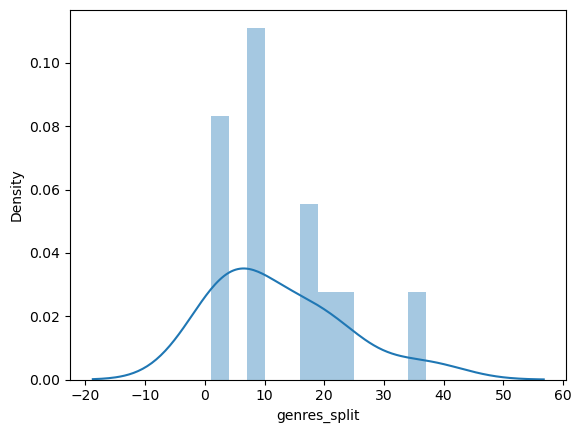

In [446]:
sns.distplot(Top_Cat4_Movie_Genres, bins = 12)
plt.show()

In [211]:
aka_movie['genres_split']

0         [Action, Adventure, Sci-Fi]
1         [Action, Adventure, Sci-Fi]
2        [Adventure, Family, Fantasy]
3       [Action, Adventure, Thriller]
4         [Mystery, Sci-Fi, Thriller]
                    ...              
1342      [Action, Adventure, Sci-Fi]
1343                         [Comedy]
1344       [Horror, Sci-Fi, Thriller]
1345         [Comedy, Drama, Romance]
1346      [Adventure, Comedy, Family]
Name: genres_split, Length: 1347, dtype: object

In [212]:
aka_movie_ex = aka_movie.explode('genres_split')

# directors_movie = movie_base.merge(tb_directors_tot,left_on=['title','year'],right_on=['title','year'], how = 'inner')
# known_for_movie = movie_base.merge(tb_known_for_tot,left_on=['title','year'],right_on=['title','year'], how = 'inner')
aka_movie = movie_base.merge(tb_movie_akas_tot,left_on=['title','year'],right_on=['title','year'], how = 'inner')
# principals_movie = movie_base.merge(tb_principals_tot,left_on=['title','year'],right_on=['title','year'], how = 'inner')
# writers_movie = movie_base.merge(tb_writers_tot,left_on=['title','year'],right_on=['title','year'], how = 'inner')

That its it

In [223]:
aka_movie_ex.describe()

,is_original_title,start_year,runtime_minutes,averagerating,numvotes,year,id,production_budget,domestic_gross,worldwide_gross,domestic_profit,total_profit,roi
count,3511.0,3511.000000,3511.000000,3511.000000,3.511000e+03,3511.000000,3511.000000,3.511000e+03,3.511000e+03,3.511000e+03,3.511000e+03,3.511000e+03,3511.000000
mean,1.0,2013.931643,109.333808,6.396839,1.310174e+05,2013.931643,50.781259,5.159249e+07,6.461335e+07,1.642200e+08,1.302086e+07,1.126275e+08,3.028426
std,0.0,2.635264,17.443934,0.949178,1.701262e+05,2.635264,28.542746,5.878112e+07,8.879223e+07,2.452305e+08,6.412381e+07,2.032516e+08,13.146012
min,1.0,2010.000000,41.000000,1.600000,2.200000e+01,2010.000000,1.000000,2.500000e+04,0.000000e+00,2.600000e+01,-3.072376e+08,-2.002376e+08,-0.999974
25%,1.0,2012.000000,96.000000,5.800000,2.807900e+04,2012.000000,26.000000,1.200000e+07,8.866745e+06,1.872998e+07,-1.256535e+07,1.395644e+06,0.128277
50%,1.0,2014.000000,107.000000,6.500000,7.463900e+04,2014.000000,51.000000,3.000000e+07,3.559311e+07,6.982148e+07,1.515430e+05,3.566904e+07,1.358951
75%,1.0,2016.000000,119.000000,7.100000,1.651080e+05,2016.000000,75.000000,6.800000e+07,8.001484e+07,1.975984e+08,2.614450e+07,1.280509e+08,3.205327
max,1.0,2019.000000,189.000000,8.800000,1.841066e+06,2019.000000,100.000000,4.106000e+08,7.000596e+08,2.048134e+09,5.000596e+08,1.748134e+09,415.564740


In [351]:
movie_top_genres[cat_cols] = \
movie_top_genres[cat_cols].astype('category')

NameError: name 'cat_cols' is not defined

In [ ]:
aka_movie_ex = aka_movie.explode('genres_split')

In [352]:
cat1_budgets = aka_movie_ex[aka_movie['production_budget'] < 10000000.0]
cat2_budgets = aka_movie_ex[aka_movie['production_budget'].between(10000000.0, 26000000.0)]
cat3_budgets = aka_movie_ex[aka_movie['production_budget'].between(26000000, 60000000.0)]
cat4_budgets = aka_movie_ex[aka_movie['production_budget'] > 60000000.0]

/var/folders/bf/n_rprvk91ndgxz_bd75lz03h0000gp/T/ipykernel_84238/1019767906.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cat1_budgets = aka_movie_ex[aka_movie['production_budget'] < 10000000.0]
/var/folders/bf/n_rprvk91ndgxz_bd75lz03h0000gp/T/ipykernel_84238/1019767906.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cat2_budgets = aka_movie_ex[aka_movie['production_budget'].between(10000000.0, 26000000.0)]
/var/folders/bf/n_rprvk91ndgxz_bd75lz03h0000gp/T/ipykernel_84238/1019767906.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cat3_budgets = aka_movie_ex[aka_movie['production_budget'].between(26000000, 60000000.0)]
/var/folders/bf/n_rprvk91ndgxz_bd75lz03h0000gp/T/ipykernel_84238/1019767906.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cat4_budgets = aka_movie_ex[aka_movie['production_budget'] > 60000000.0]


In [220]:
cat4_budgets[cat4_budgets.sort_values(by = 'roi', ascending = False).duplicated(keep='first').head(20)]

/var/folders/bf/n_rprvk91ndgxz_bd75lz03h0000gp/T/ipykernel_84238/2025384729.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cat4_budgets[cat4_budgets.sort_values(by = 'roi', ascending = False).duplicated(keep='first').head(20)]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [353]:
movie_top_bot['genres_split'].astype('O')
movie_top_bot['genres_split'].astype('category')

0          Action
0       Adventure
0          Sci-Fi
1          Action
1       Adventure
          ...    
1345       Comedy
1345        Drama
1345      Romance
1346    Adventure
1346       Comedy
Name: genres_split, Length: 3251, dtype: category
Categories (13, object): ['Action', 'Adventure', 'Animation', 'Biography', ..., 'Mystery', 'Romance', 'Sci-Fi', 'Thriller']

,movie_id,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,...,release_date,id,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,total_profit,roi,production_budget_cat


<Axes: xlabel='production_budget', ylabel='worldwide_gross'>

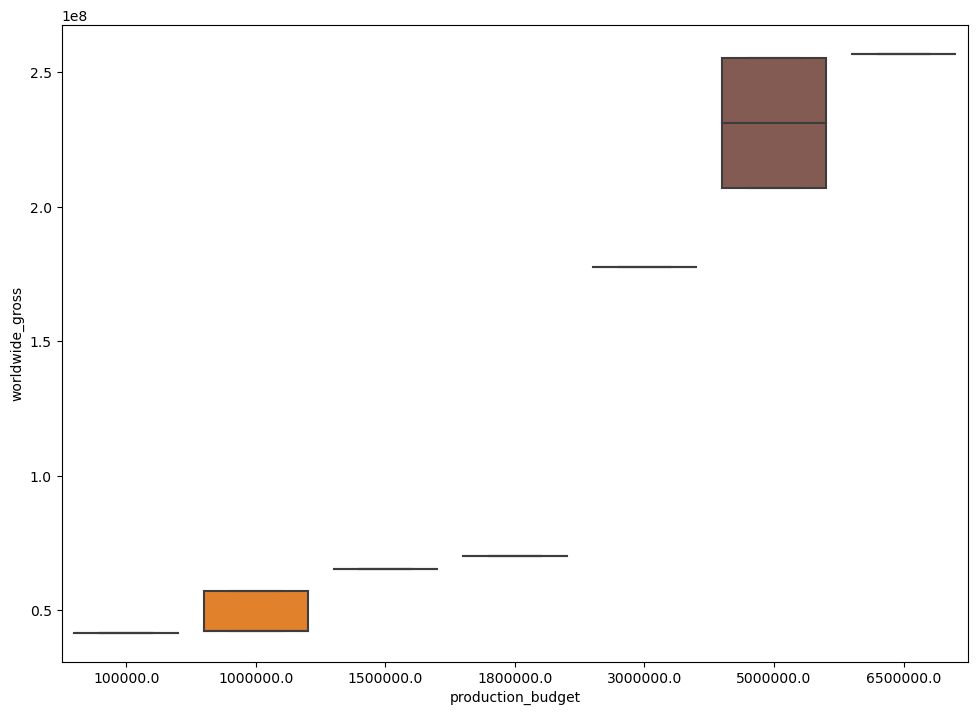

In [158]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(x = 'genres', y = 'roi', data = aka_movie_ex, hue = 'production_budget_cat', ax = ax)
ax.set_ylim(ymin=10, ymax=75)
# sns.boxplot(x = 'production_budget', y = 'worldwide_gross', data = aka_movie_ex.sort_values(by = 'roi', ascending = False).head(20), ax = ax, showfliers = False)
# cat3_budgets.sort_values(by = 'roi', ascending = False).head(20)
# plt.show()

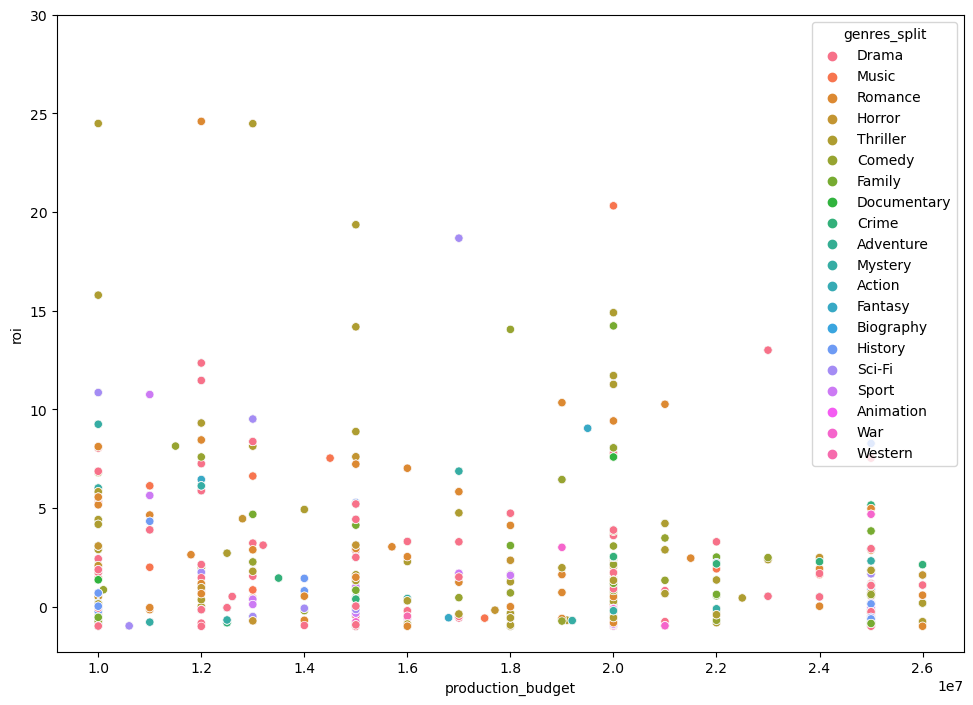

In [274]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(x = 'production_budget', y = 'roi', data = cat2_budgets, hue = 'genres_split', ax = ax)
ax.set_ylim(ymax=30.0)
plt.show()

In [226]:
cat2_budgets['genres_split'].value_counts()

Drama          242
Comedy         134
Thriller        71
Crime           68
Romance         65
Biography       56
Action          55
Horror          54
Mystery         39
Adventure       35
Fantasy         22
Music           20
Family          20
Sci-Fi          20
History         18
Sport           15
Animation       10
War              9
Documentary      4
Western          1
Name: genres_split, dtype: int64

In [233]:
cat1_budgets_flop = cat1_budgets[cat1_budgets['roi'] < 0]
cat2_budgets_flop = cat2_budgets[cat2_budgets['roi'] < 0]
cat3_budgets_flop = cat3_budgets[cat3_budgets['roi'] < 0]
cat4_budgets_flop = cat4_budgets[cat4_budgets['roi'] < 0]

In [285]:
cat1_cashcow = cat1_budgets[cat1_budgets['roi'] > 10]
cat2_cashcow = cat2_budgets[cat2_budgets['roi'] > 5]
cat3_cashcow = cat3_budgets[cat3_budgets['roi'] > 5]
cat4_cashcow = cat4_budgets[cat4_budgets['roi'] > 10]

In [315]:

movie_top_genres = aka_movie_ex[aka_movie_ex['genres_split'].isin(top_genres)]

In [330]:
movie_top_genres

,movie_id,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,...,release_date,id,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,total_profit,roi,production_budget_cat
0,tt0369610,Jurassic World,None,None,original,None,1.0,Jurassic World,Jurassic World,2015,...,2015-06-12,34,Jurassic World,215000000.0,652270625.0,1.648855e+09,437270625.0,1.433855e+09,6.669092,cat5
0,tt0369610,Jurassic World,None,None,original,None,1.0,Jurassic World,Jurassic World,2015,...,2015-06-12,34,Jurassic World,215000000.0,652270625.0,1.648855e+09,437270625.0,1.433855e+09,6.669092,cat5
0,tt0369610,Jurassic World,None,None,original,None,1.0,Jurassic World,Jurassic World,2015,...,2015-06-12,34,Jurassic World,215000000.0,652270625.0,1.648855e+09,437270625.0,1.433855e+09,6.669092,cat5
1,tt0401729,John Carter,None,None,original,None,1.0,John Carter,John Carter,2012,...,2012-03-09,14,John Carter,275000000.0,73058679.0,2.827781e+08,-201941321.0,7.778100e+06,0.028284,cat5
1,tt0401729,John Carter,None,None,original,None,1.0,John Carter,John Carter,2012,...,2012-03-09,14,John Carter,275000000.0,73058679.0,2.827781e+08,-201941321.0,7.778100e+06,0.028284,cat5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,tt5462602,The Big Sick,None,None,original,None,1.0,The Big Sick,The Big Sick,2017,...,2017-06-23,64,The Big Sick,5000000.0,42872467.0,5.397286e+07,37872467.0,4.897286e+07,9.794572,cat2
1345,tt5462602,The Big Sick,None,None,original,None,1.0,The Big Sick,The Big Sick,2017,...,2017-06-23,64,The Big Sick,5000000.0,42872467.0,5.397286e+07,37872467.0,4.897286e+07,9.794572,cat2
1345,tt5462602,The Big Sick,None,None,original,None,1.0,The Big Sick,The Big Sick,2017,...,2017-06-23,64,The Big Sick,5000000.0,42872467.0,5.397286e+07,37872467.0,4.897286e+07,9.794572,cat2
1346,tt6139732,Aladdin,None,None,original,None,1.0,Aladdin,Aladdin,2019,...,2019-05-24,81,Aladdin,182000000.0,246734314.0,6.192343e+08,64734314.0,4.372343e+08,2.402386,cat5


In [331]:
cat1_budgets = movie_top_genres[movie_top_genres['production_budget'] < 10000000.0]
cat2_budgets = movie_top_genres[movie_top_genres['production_budget'].between(10000000.0, 26000000.0)]
cat3_budgets = movie_top_genres[movie_top_genres['production_budget'].between(26000000, 60000000.0)]
cat4_budgets = movie_top_genres[movie_top_genres['production_budget'] > 60000000.0]

In [343]:
cat1_cashcow = cat1_budgets[cat1_budgets['roi'] > 10]
cat2_cashcow = cat2_budgets[cat2_budgets['roi'] > 5]
cat3_cashcow = cat3_budgets[cat3_budgets['roi'] > 5]
cat4_cashcow = cat4_budgets[cat4_budgets['roi'] > 5]

In [329]:

cat1_TG = movie_top_genres[cat1_budgets

SyntaxError: invalid syntax (1023839012.py, line 1)

In [311]:
top_genres = list(aka_movie_ex['genres_split'].value_counts().head(13).keys())

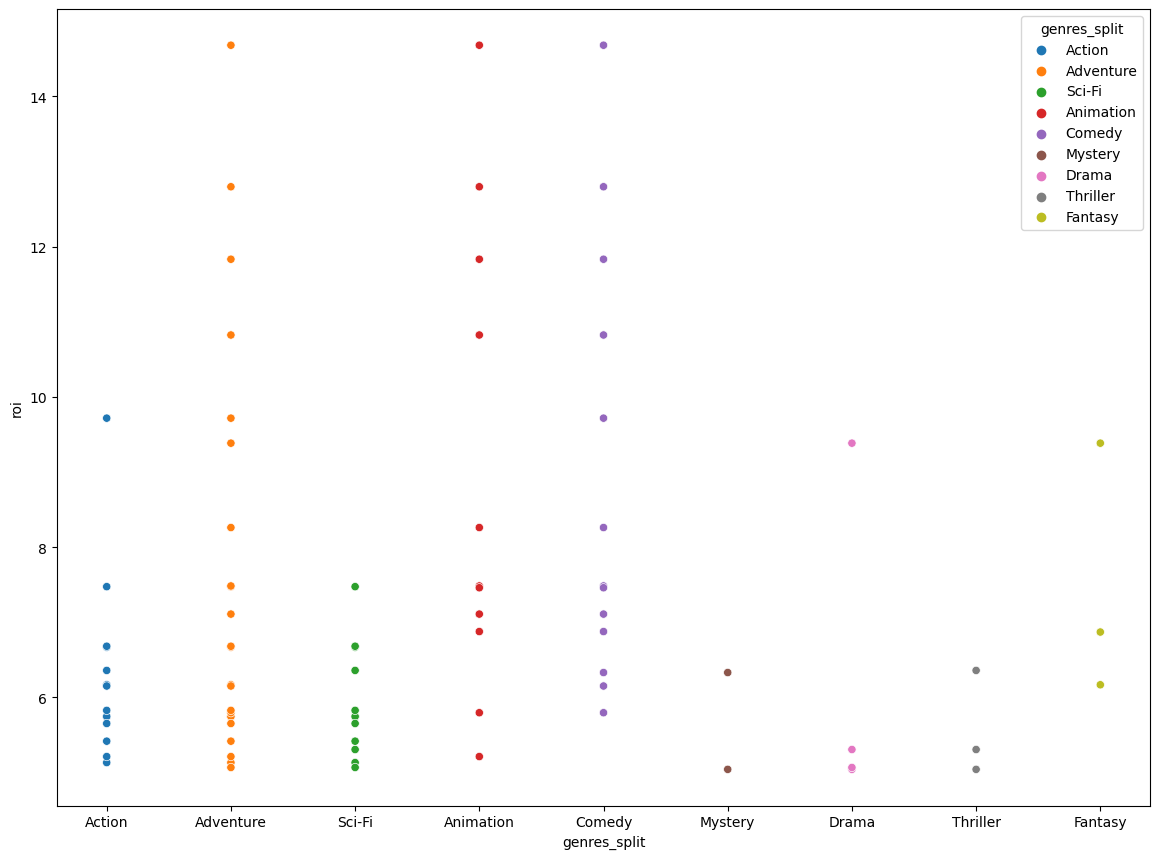

In [345]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.7)
sns.scatterplot(x = 'genres_split', y = 'roi', data = cat4_cashcow, hue = 'genres_split', ax = ax)
plt.tight_layout()
plt.show()

In [350]:
cat1_budgets.groupby('genres_split').describe()

is_original_title                                    start_year  \
                         count mean  std  min  25%  50%  75%  max      count   
genres_split                                                                   
Action                    33.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       33.0   
Adventure                 15.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       15.0   
Animation                  1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0        1.0   
Biography                 25.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       25.0   
Comedy                    94.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       94.0   
Crime                     34.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       34.0   
Drama                    185.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      185.0   
Fantasy                   15.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       15.0   
Horror                    68.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       68.0   
Mystery                   40.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       40.0   
Romance                   57.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       57.0   
Sci-Fi                    15.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       15.0   
Thriller                  60.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       60.0   

                           ... total_profit                 roi             \
                     mean  ...          75%          max  count       mean   
genres_split               ...                                               
Action        2014.363636  ...   6433427.00  285154618.0   33.0   1.608838   
Adventure     2014.533333  ...  21405332.50   36824066.0   15.0   2.310791   
Animation     2015.000000  ...  -2293832.00   -2293832.0    1.0  -0.286729   
Biography     2014.800000  ...  20529498.00  285154618.0   25.0   4.406403   
Comedy        2013.468085  ...  12257165.25  163549753.0   94.0   2.366219   
Crime         2013.617647  ...   3674736.25   45411620.0   34.0   0.882520   
Drama         2013.627027  ...  15566240.00  285154618.0  185.0   3.844400   
Fantasy       2014.933333  ...  19335996.50   57422558.0   15.0   5.823451   
Horror        2014.382353  ...  69482391.50  250367951.0   68.0  17.270890   
Mystery       2014.400000  ...  85022068.75  250367951.0   40.0  22.547820   
Romance       2013.298246  ...   9577401.00   73504421.0   57.0   3.432650   
Sci-Fi        2014.066667  ...  18301689.50  102534881.0   15.0   3.847729   
Thriller      2013.900000  ...  41625960.00  250367951.0   60.0  15.944190   

                                                                              
                    std       min       25%       50%        75%         max  
genres_split                                                                  
Action         5.887570 -0.999974 -0.953732 -0.625853   1.237197   30.016276  
Adventure      4.057019 -0.997384 -0.631824  0.113713   3.872910   11.925073  
Animation           NaN -0.286729 -0.286729 -0.286729  -0.286729   -0.286729  
Biography      7.431019 -0.999537 -0.444355  1.299758   4.105900   30.016276  
Comedy         4.386055 -0.999974 -0.652978  1.133643   4.035111   23.364250  
Crime          3.170367 -0.996403 -0.769014 -0.343048   1.171334   15.434588  
Drama          7.154398 -0.999974 -0.419103  1.145507   4.896424   42.497008  
Fantasy        8.767025 -0.995408 -0.338918  2.789136   8.196839   26.697820  
Horror        52.147473 -0.998489 -0.374324  4.233645  18.627651  415.564740  
Mystery       65.120846 -0.945783  2.905315  7.215294  19.909416  415.564740  
Romance        5.465796 -0.991782 -0.170881  1.145507   4.896424   26.697820  
Sci-Fi         4.573460 -0.998944 -0.240635  4.303564   6.793661   11.392765  
Thriller      54.145948 -0.998944 -0.650142  3.348318  17.533648  415.564740  

[13 rows x 104 columns]

In [287]:
cat1_cashcow['genres_split'].head(1000).value_counts()

Drama          24
Horror         22
Thriller       19
Mystery        16
Romance         6
Biography       6
Fantasy         4
Comedy          4
Sci-Fi          3
Action          2
Documentary     2
Adventure       1
Music           1
Family          1
Crime           1
Name: genres_split, dtype: int64

In [228]:
cat1

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [35]:
directors_movie.info()
known_for_movie.info()
aka_movie.info()
principals_movie.info()
writers_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4330 entries, 0 to 4329
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     4330 non-null   int64         
 1   movie_id_x                4330 non-null   object        
 2   title                     4330 non-null   object        
 3   region_x                  0 non-null      object        
 4   language_x                0 non-null      object        
 5   types_x                   4330 non-null   object        
 6   attributes_x              0 non-null      object        
 7   is_original_title_x       4330 non-null   float64       
 8   primary_title_x           4330 non-null   object        
 9   original_title_x          4330 non-null   object        
 10  start_year_x              4330 non-null   int64         
 11  runtime_minutes_x         4330 non-null   float64       
 12  genres_x            

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13570 entries, 0 to 13569
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     13570 non-null  int64         
 1   movie_id_x                13570 non-null  object        
 2   title                     13570 non-null  object        
 3   region_x                  0 non-null      object        
 4   language_x                0 non-null      object        
 5   types_x                   13570 non-null  object        
 6   attributes_x              0 non-null      object        
 7   is_original_title_x       13570 non-null  float64       
 8   primary_title_x           13570 non-null  object        
 9   original_title_x          13570 non-null  object        
 10  start_year_x              13570 non-null  int64         
 11  runtime_minutes_x         13570 non-null  float64       
 12  genres_x          

In [31]:
tb_movie_basics_tot.rename(columns = {'index' : "old_index"}, inplace = True)

In [35]:
tb_movie_basics_tot.drop(columns = 'old_index', inplace = True)

In [37]:
tb_movie_basics_tot.to_csv('movie_basic.csv',index=False)
recent_movie_budgets.to_csv('movies_budgets.csv',index=False)

            EXPLODE LATER

In [20]:
# separating the genres and primary at person table
tb_writers_tot = tb_writers_tot.explode('genres_split')
tb_directors_tot = tb_directors_tot.explode('genres_split')
tb_principals_tot = tb_principals_tot.explode('genres_split')
tb_known_for_tot = tb_known_for_tot.explode('genres_split')
tb_writers_tot = tb_writers_tot.explode('primary_profession_split')
tb_directors_tot = tb_directors_tot.explode('primary_profession_split')
tb_principals_tot = tb_principals_tot.explode('primary_profession_split')
tb_known_for_tot = tb_known_for_tot.explode('primary_profession_split')

In [37]:
# separating the genres and primary at movies table
tb_movie_akas_tot = tb_movie_akas_tot.explode('genres_split')
tb_movie_basics_tot = tb_movie_basics_tot.explode('genres_split')

In [22]:
# trasnforming in category the genres and the primary profession
cat_cols =  ['primary_profession','region','language','types','attributes','genres','genres_split','primary_profession_split']

tb_writers_tot[cat_cols] = \
tb_writers_tot[cat_cols].astype('category')
tb_directors_tot[cat_cols] = \
tb_directors_tot[cat_cols].astype('category')
tb_principals_tot[cat_cols] = \
tb_principals_tot[cat_cols].astype('category')
tb_known_for_tot[cat_cols] = \
tb_known_for_tot[cat_cols].astype('category')

In [34]:
tn_movie_budgets
tb_movie_basics_tot

,movie_id,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,genres_split,all_titles,all_titles_split
2,tt0063540,Sunghursh,None,None,original,None,1.0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,"[Sangharsh, Sungharsh, Sunghursh, Sunghursh, S...","[Sangharsh, Sungharsh, Sunghursh, Sunghursh, S..."
2,tt0063540,Sunghursh,None,None,original,None,1.0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Crime,"[Sangharsh, Sungharsh, Sunghursh, Sunghursh, S...","[Sangharsh, Sungharsh, Sunghursh, Sunghursh, S..."
2,tt0063540,Sunghursh,None,None,original,None,1.0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Drama,"[Sangharsh, Sungharsh, Sunghursh, Sunghursh, S...","[Sangharsh, Sungharsh, Sunghursh, Sunghursh, S..."
5,tt0066787,Ashad Ka Ek Din,None,None,original,None,1.0,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,"[Ashad Ka Ek Din, Ashad Ka Ek Din, One Day Bef...","[Ashad Ka Ek Din, Ashad Ka Ek Din, One Day Bef..."
5,tt0066787,Ashad Ka Ek Din,None,None,original,None,1.0,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Drama,"[Ashad Ka Ek Din, Ashad Ka Ek Din, One Day Bef...","[Ashad Ka Ek Din, Ashad Ka Ek Din, One Day Bef..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331690,tt9911774,Padmavyuhathile Abhimanyu,None,None,original,None,1.0,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,Drama,"[Padmavyoohathile Abhimanyu, Padmavyuhathile A...","[Padmavyoohathile Abhimanyu, Padmavyuhathile A..."
331692,tt9913248,Nepal - Homebird,None,None,original,None,1.0,Nepal - Homebird,Nepal - Homebird,2019,52.0,Documentary,Documentary,"[Nepal - Homebird, Nepal - Homebird, Népal - À...","[Nepal - Homebird, Nepal - Homebird, Népal - À..."
331696,tt9914254,Kirsebæreventyret,None,None,original,None,1.0,A Cherry Tale,Kirsebæreventyret,2019,85.0,Documentary,Documentary,"[A Cherry Tale, Kirsebæreventyret, Kirsebæreve...","[A Cherry Tale, Kirsebæreventyret, Kirsebæreve..."
331699,tt9915436,Vida em Movimento,None,None,original,None,1.0,Vida em Movimento,Vida em Movimento,2019,70.0,Documentary,Documentary,"[Life in Movement, Vida em Movimento]","[Life in Movement, Vida em Movimento]"


In [380]:
cat_cols =  ['genres_split','region','language','types','attributes']

tb_movies_tot[cat_cols] = \
tb_movies_tot[cat_cols].astype('category')
tb_movies_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534387 entries, 0 to 261805
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   movie_id           534387 non-null  object  
 1   title              534387 non-null  object  
 2   region             452530 non-null  category
 3   language           76295 non-null   category
 4   types              322728 non-null  category
 5   attributes         27622 non-null   category
 6   is_original_title  534387 non-null  float64 
 7   primary_title      534387 non-null  object  
 8   original_title     534387 non-null  object  
 9   start_year         534387 non-null  int64   
 10  runtime_minutes    518564 non-null  float64 
 11  genres             533202 non-null  object  
 12  averagerating      534387 non-null  float64 
 13  numvotes           534387 non-null  int64   
 14  genres_split       533202 non-null  category
dtypes: category(5), float64(3), int64(

In [403]:
tb_genres_rates = tb_movies_tot[tb_movies_tot['is_original_title']==1][['genres_split','averagerating','numvotes','movie_id','title']]
#[tb_genres_rates['numvotes'] == 0]

In [551]:
tb_genres_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68913 entries, 38 to 261804
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   genres_split   68703 non-null  category
 1   averagerating  68913 non-null  float64 
 2   numvotes       68913 non-null  int64   
 3   movie_id       68913 non-null  object  
 4   title          68913 non-null  object  
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 5.2+ MB


In [404]:
tb_genres_rates[tb_genres_rates['numvotes']==tb_genres_rates['numvotes'].max()]

,genres_split,averagerating,numvotes,movie_id,title
7274,Action,8.8,1841066,tt1375666,Inception
7274,Adventure,8.8,1841066,tt1375666,Inception
7274,Sci-Fi,8.8,1841066,tt1375666,Inception


In [405]:
def fun_estimator(input_series):
    
    X_centered = input_series - input_series.mean()
    fun_est = np.abs(X_centered).sum()
    return fun_est


In [569]:
order_gen_num = list(tb_genres_rates.groupby(['genres_split'])['numvotes'].mean().sort_values(ascending = False).head(4).index)
order_gen_ave = list(tb_genres_rates.groupby(['genres_split'])['averagerating'].mean().sort_values(ascending = False).index)


In [539]:
tb_genres_rates.groupby(['genres_split'])['numvotes'].count()

genres_split
Action          4136
Adult              2
Adventure       2449
Animation       1209
Biography       2056
Comedy          8985
Crime           2865
Documentary     7104
Drama          17535
Family          1855
Fantasy         1311
Game-Show          1
History         1516
Horror          3727
Music            920
Musical          293
Mystery         1759
News             196
Reality-TV         2
Romance         3662
Sci-Fi          1227
Sport            568
Thriller        4628
War              560
Western          137
Name: numvotes, dtype: int64

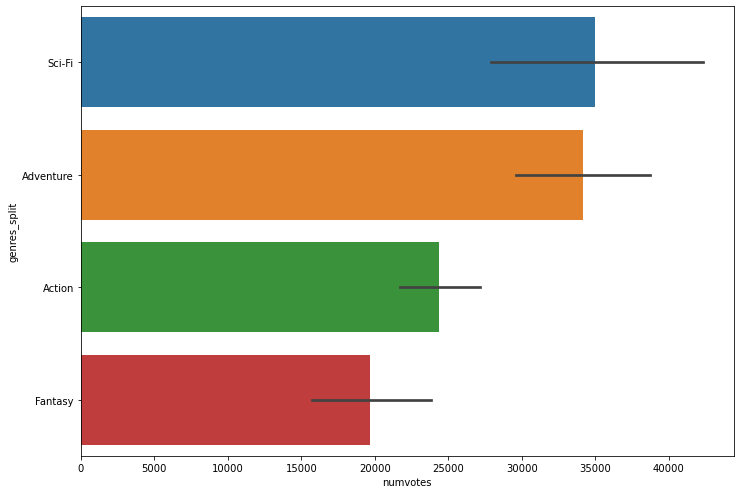

In [570]:
order = order_gen_num
x = 'numvotes'
y = 'genres_split'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(y = y , x = x, data = tb_genres_rates,order = order, ax=ax)
plt.show()

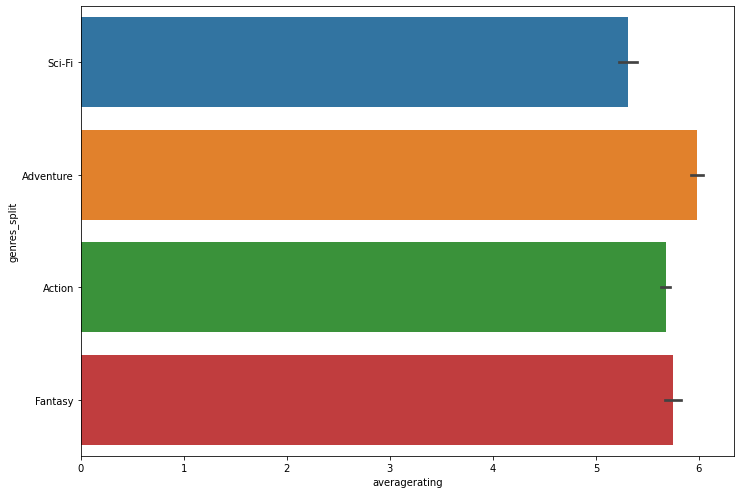

In [571]:
order = order_gen_num
x = 'averagerating'
y = 'genres_split'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(y = y , x = x, data = tb_genres_rates,order = order, ax=ax)
plt.show()

/Users/thiagobassi/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/thiagobassi/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


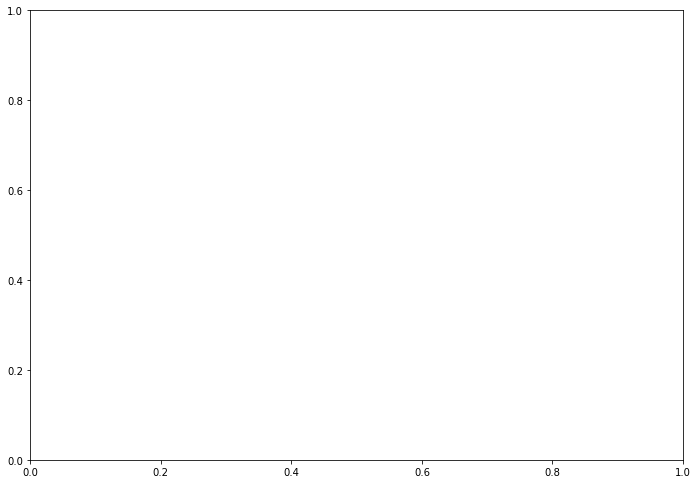

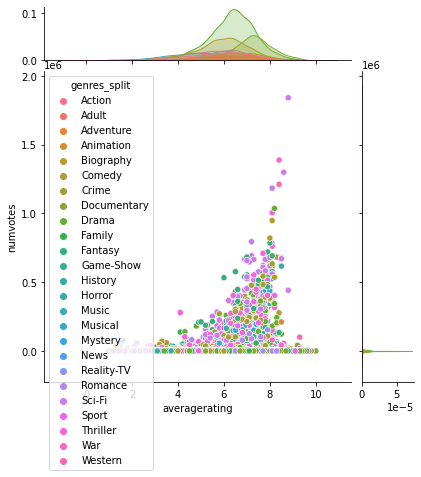

In [575]:
order = order_gen_num
x = 'averagerating'
y = 'numvotes'
hue = 'genres_split'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.jointplot(x = x, y = y, hue = hue, marginal_ticks=True, data = tb_genres_rates)
plt.show()

In [559]:
tb_genres_rates[tb_genres_rates['genres_split'] == ['Sci-Fi','Drama']]

ValueError: ('Lengths must match to compare', (68913,), (2,))

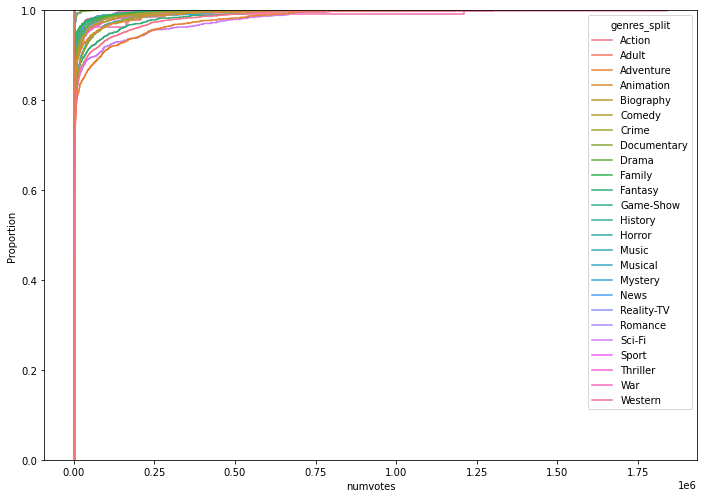

In [552]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.ecdfplot(x = 'numvotes', hue = 'genres_split',data = tb_genres_rates.[tb_genres_rates['genres_split']==[order_gen_num]])
plt.show()

In [459]:
sns.violinplot(x = 'numvotes', y = 'averagerating',
               hue = 'genres_split' 
               data = tb_genres_rates)
plt.show()

SyntaxError: invalid syntax (<ipython-input-459-656535527444>, line 3)

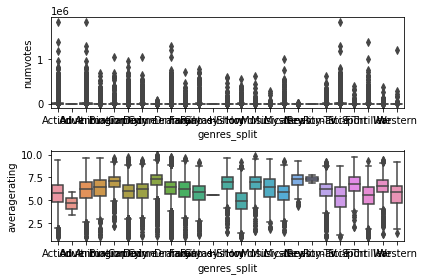

In [408]:
#tb_movie_akas[tb_movie_akas.runtime_minutes == tb_movie_akas.runtime_minutes.max()]
fig, ax = plt.subplots(2,1)
sns.boxplot(x = 'genres_split', y = 'numvotes', data = tb_genres_rates, orient = 'v', ax = ax[0])
sns.boxplot(x = 'genres_split', y = 'averagerating', data = tb_genres_rates, orient = 'v', ax = ax[1])
plt.tight_layout()

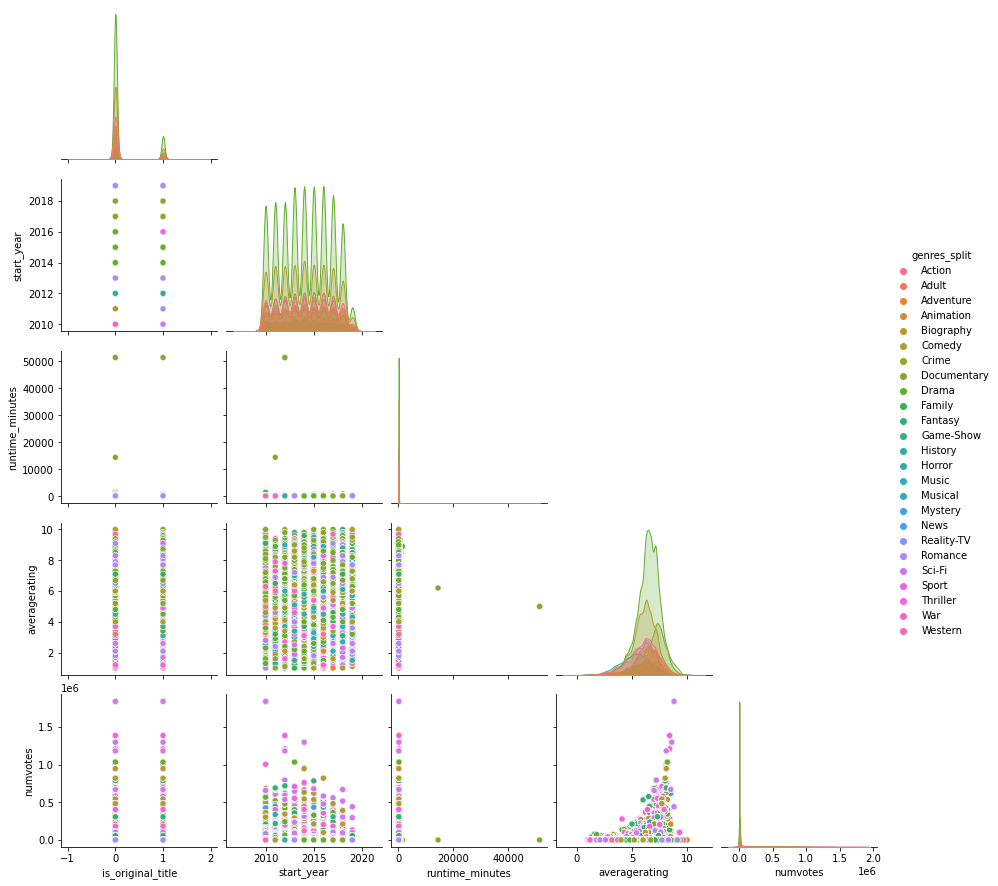

In [386]:
sns.pairplot(tb_movies_tot, hue = 'genres_split', 
             corner = True)
plt.show()

In [337]:
tb_movie_akas.dropna(subset = ['genres_split'], inplace = True)

ValueError: columns must be unique

In [363]:
tb_movie_akas.explode('genres_split')

ValueError: columns must be unique

In [241]:
tb_writers[tb_writers['person_id'] == tb_principals.person_id[tb_principals['category'] == 'writer']]

ValueError: Can only compare identically-labeled Series objects

DatabaseError: Execution failed on sql 'SELECT B.movie_id, B.title, B.region, B.language, B.types, B.atribute, B.is_original_title, A.movie_id, A.primary_title, A.original_title, A.start_year, A.runtime_minutes, A.genres, C.averagerating, C.numvotes FROM movie_akas B, movie_basics A, movie_ratings C WHERE B.movie_id=A.movie_id and B.movie_id=C.movie_id': no such column: B.atribute

In [ ]:
qr_geral_people = 'SELECT * FROM tb_persons B where B.person_id ' 

tb_geral_people= pd.read_sql(qr_geral_people, con)

tb_geral_people

In [ ]:
A tb_movie_basics A where A.movie_id (MAIN)
B tb_persons B where B.person_id (MAIN)

A - tb_movie_ratings C where C.movie_id=A.movie_id
B / A - tb_directors D where D.movie_id=A.movie_id and D.person_id=B.person_id
A - tb_movie_akas F where F.movie_id=A.movie_id
B / A - tb_principals E where E.movie_id=A.movie_id and E.person_id=B.person_id
B / A tb_writers G where G.movie_id=A.movie_id and G.person_id=B.person_id
B / A tb_known_for H where H.movie_id=A.movie_id and H.person_id=B.person_id

In [224]:
tb_movie_basics['start_year'].min()
tb_movie_basics[(tb_movie_basics['primary_title'].str.contains('Fantastic Beasts', regex=True))]


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
33094,tt3183660,Fantastic Beasts and Where to Find Them,Fantastic Beasts and Where to Find Them,2016,132.0,"Adventure,Family,Fantasy",tt3183660,7.3,365353
43110,tt4123430,Fantastic Beasts: The Crimes of Grindelwald,Fantastic Beasts: The Crimes of Grindelwald,2018,134.0,"Adventure,Family,Fantasy",tt4123430,6.6,163151


In [221]:
#tb_known_for
#tb_movie_basics.info()
#tn_movie_budgets.info()
#bom_movie_gross.info()
tb_known_for[tb_known_for['category']=='writer'].groupby('primary_name')
#write_count = tb_known_for.primary_name[tb_known_for['category']=='writer'].value_counts()
#write_count.head(20)
# tn_movie_budgets[(tn_movie_budgets.domestic_gross == '$0')].head(15)
#tn_movie_budgets['movie'][(tn_movie_budgets.domestic_gross == '$0')]
# bom_movie_gross[(bom_movie_gross.title == tn_movie_budgets['movie'][(tn_movie_budgets.domestic_gross == '$0')])]

In [213]:
genres = list(tb_movie_basics['genres'].str.split())
movie_id =  list(tb_movie_basics['movie_id'])

In [220]:
genres

SyntaxError: invalid syntax (<ipython-input-220-8f8d0c997759>, line 1)

In [125]:
tb_directors.loc[(tb_directors['primary_name']=='Bill Haley')]

,movie_id,person_id,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,priary_name
1,tt0462036,nm1940585,Bill Haley,NaN,NaN,"director,writer,producer",Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110.0,Drama,Bill Haley


In [129]:
#tb_movie_akas
genres_list = list((tb_movie_basics['genres'].value_counts().index))
genres_list
tb_movie_basics['genres'].convert_dtypes()

['Drama',
 'Documentary',
 'Comedy',
 'Horror',
 'Comedy,Drama',
 'Thriller',
 'Drama,Romance',
 'Comedy,Romance',
 'Comedy,Drama,Romance',
 'Horror,Thriller',
 'Drama,Thriller',
 'Action',
 'Romance',
 'Biography,Documentary',
 'Documentary,Drama',
 'Documentary,Music',
 'Comedy,Horror',
 'Action,Crime,Drama',
 'Crime,Drama,Thriller',
 'Crime,Drama',
 'Family',
 'Biography,Documentary,History',
 'Drama,Family',
 'Documentary,History',
 'Action,Drama',
 'Horror,Mystery,Thriller',
 'Biography,Documentary,Drama',
 'Drama,Horror,Thriller',
 'Animation',
 'Action,Thriller',
 'Action,Comedy',
 'Documentary,Sport',
 'Comedy,Drama,Family',
 'Drama,Mystery,Thriller',
 'Sci-Fi',
 'Crime',
 'Action,Adventure,Comedy',
 'Biography,Drama',
 'Biography,Documentary,Music',
 'Action,Crime,Thriller',
 'Adventure,Animation,Comedy',
 'Action,Drama,Thriller',
 'Comedy,Crime,Drama',
 'Action,Comedy,Crime',
 'Drama,Horror,Mystery',
 'Documentary,News',
 'Drama,History',
 'Crime,Drama,Mystery',
 'Drama,Myste

In [69]:
tb_directors['director_name'] = tb_directors
tb_directors['movie_directed'] = tb_directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [89]:
tb_directors['person_id'].values

array(['nm0899854', 'nm1940585', 'nm0151540', ..., 'nm10123242',
       'nm10123248', 'nm4993825'], dtype=object)

In [8]:
%%bash


sqlite3 data/im.db
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [ ]:
query = cursor_obj.execute("""
SELECT * 
FROM airports 
LIMIT 5
""")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970627 entries, 0 to 699717
Data columns (total 21 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   movie_id                  object 
 1   person_id                 object 
 2   primary_name              object 
 3   birth_year                float64
 4   death_year                float64
 5   primary_profession        object 
 6   title                     object 
 7   region                    object 
 8   language                  object 
 9   types                     object 
 10  attributes                object 
 11  is_original_title         float64
 12  primary_title             object 
 13  original_title            object 
 14  start_year                int64  
 15  runtime_minutes           float64
 16  genres                    object 
 17  averagerating             float64
 18  numvotes                  int64  
 19  genres_split              object 
 20  primary_profession_split 

,birth_year,death_year,is_original_title,start_year,runtime_minutes,averagerating,numvotes
count,1.646627e+06,154582.000000,3.970627e+06,3.970627e+06,3.877281e+06,3.970627e+06,3.970627e+06
mean,1.961816e+03,1978.785221,1.139581e-01,2.014145e+03,1.030775e+02,6.163128e+00,5.301072e+04
std,2.905267e+01,71.814285,3.177604e-01,2.476214e+00,2.177981e+01,1.195388e+00,1.302787e+05
min,9.730000e+02,17.000000,0.000000e+00,2.010000e+03,4.000000e+00,1.000000e+00,5.000000e+00
25%,1.958000e+03,1977.000000,0.000000e+00,2.012000e+03,9.000000e+01,5.400000e+00,1.430000e+02
50%,1.968000e+03,1998.000000,0.000000e+00,2.014000e+03,9.900000e+01,6.300000e+00,1.824000e+03
75%,1.975000e+03,2014.000000,0.000000e+00,2.016000e+03,1.150000e+02,7.000000e+00,3.042000e+04
max,2.005000e+03,2019.000000,1.000000e+00,2.019000e+03,1.440000e+03,1.000000e+01,1.841066e+06
